In [14]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

In [15]:
(X_treino, y_treino), (X_teste, y_teste) = mnist.load_data()

Text(0.5, 1.0, 'Classe 0')

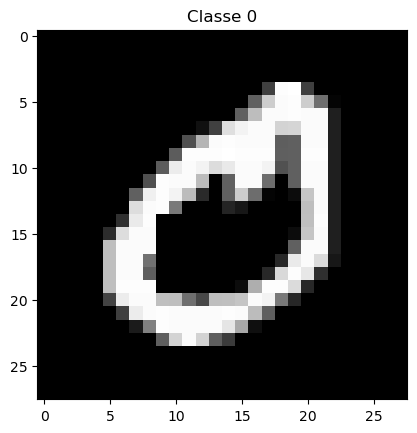

In [16]:
plt.imshow(X_treino[21], cmap="gray")
plt.title("Classe " + str(y_treino[21]))

In [17]:
X_treino = X_treino.reshape((len(X_treino), np.prod(X_treino.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))

In [18]:
X_treino = X_treino.astype("float32")
X_teste = X_teste.astype("float32")

In [19]:
X_treino /= 255
X_teste /= 255

In [20]:
y_treino = np_utils.to_categorical(y_treino, 10)
y_teste = np_utils.to_categorical(y_teste, 10)
y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [21]:
modelo = Sequential()

modelo.add(Dense(units=64, activation="relu", input_dim=784))
modelo.add(Dropout(0.2))

modelo.add(Dense(units=64, activation="relu"))
modelo.add(Dropout(0.2))

modelo.add(Dense(units=64, activation="relu"))
modelo.add(Dropout(0.2))

modelo.add(Dense(units=10, activation="softmax"))

2024-06-24 13:42:25.000013: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [22]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [23]:
modelo.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

historico = modelo.fit(
    X_treino, y_treino, epochs=20, validation_data=(X_teste, y_teste)
)

Epoch 1/20
1875/1875 [==============================] - 26s 13ms/step - loss: 0.4442 - accuracy: 0.8643 - val_loss: 0.1662 - val_accuracy: 0.9489
Epoch 2/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2253 - accuracy: 0.9354 - val_loss: 0.1340 - val_accuracy: 0.9594
Epoch 3/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1841 - accuracy: 0.9464 - val_loss: 0.1101 - val_accuracy: 0.9650
Epoch 4/20
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1641 - accuracy: 0.9531 - val_loss: 0.1113 - val_accuracy: 0.9674
Epoch 5/20
1875/1875 [==============================] - 27s 14ms/step - loss: 0.1498 - accuracy: 0.9570 - val_loss: 0.1099 - val_accuracy: 0.9679
Epoch 6/20
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1362 - accuracy: 0.9597 - val_loss: 0.0950 - val_accuracy: 0.9729
Epoch 7/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1284 - accuracy: 0.9627 - val_loss: 0.0915 -

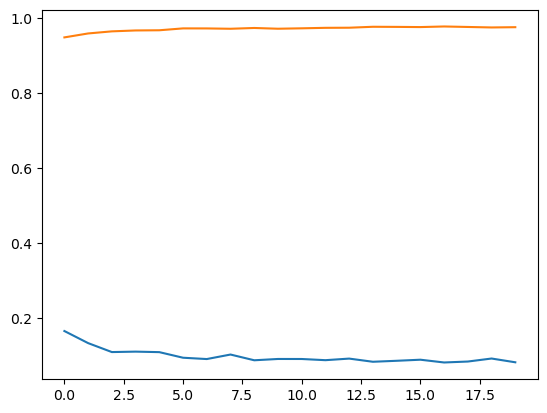

In [31]:
historico.history.keys()

plt.plot(historico.history["val_loss"])
plt.plot(historico.history["val_accuracy"])

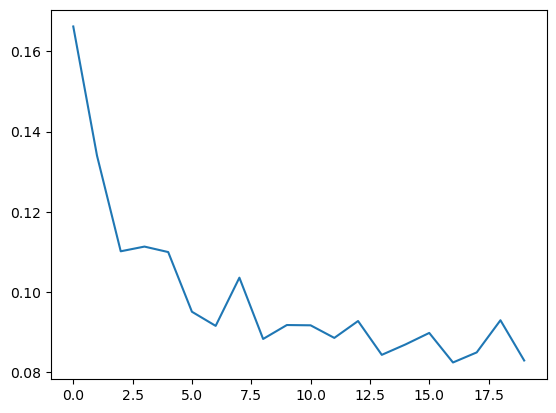

In [32]:
plt.plot(historico.history["val_loss"])

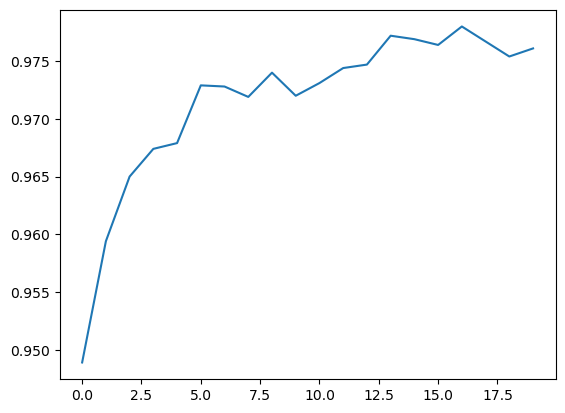

In [30]:
plt.plot(historico.history["val_accuracy"])

In [33]:
previsao = modelo.predict(X_teste)
previsao

313/313 [==============================] - 2s 6ms/step


array([[3.3846920e-12, 2.6485185e-07, 1.0163050e-06, ..., 9.9997735e-01,
        2.7067518e-10, 2.0887152e-05],
       [2.6755865e-14, 8.4468174e-06, 9.9999142e-01, ..., 9.9268949e-10,
        3.1487850e-09, 2.9536006e-17],
       [5.8844590e-13, 9.9999952e-01, 1.4797253e-08, ..., 5.3186021e-08,
        2.6740869e-07, 4.0712958e-10],
       ...,
       [3.0305129e-12, 1.6413028e-09, 6.1182334e-08, ..., 2.1073147e-08,
        2.8713827e-09, 3.5953797e-06],
       [7.1924272e-18, 2.3256084e-17, 2.8576026e-17, ..., 5.3975391e-16,
        3.7127754e-10, 2.7226016e-13],
       [6.1068533e-12, 1.4578432e-13, 1.4509414e-13, ..., 1.1301756e-20,
        1.4045602e-10, 2.4082399e-20]], dtype=float32)

In [34]:
y_teste = [np.argmax(t) for t in y_teste]
y_previsao_matriz = [np.argmax(t) for t in previsao]

confusao = confusion_matrix(y_teste, y_previsao_matriz)
confusao

array([[ 969,    1,    1,    0,    0,    2,    1,    2,    4,    0],
       [   0, 1123,    1,    2,    0,    1,    3,    0,    5,    0],
       [   1,    0, 1015,    3,    1,    1,    1,    7,    3,    0],
       [   0,    0,    4,  980,    0,   16,    0,    5,    1,    4],
       [   1,    0,    5,    0,  960,    0,    3,    1,    0,   12],
       [   3,    0,    0,    5,    1,  876,    4,    0,    2,    1],
       [   5,    3,    0,    0,    3,    4,  940,    0,    3,    0],
       [   2,    5,    8,    3,    1,    0,    0,  995,    3,   11],
       [   4,    1,    2,    4,    9,    9,    2,    6,  927,   10],
       [   2,    3,    0,    9,   13,    3,    0,    3,    0,  976]])

In [35]:
y_treino[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [36]:
novo = X_treino[20]

novo = np.expand_dims(novo, axis=0)

pred = modelo.predict(novo)

pred = [np.argmax(t) for t in pred]
pred

1/1 [==============================] - 0s 17ms/step


[4]